In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

seed = 1234
np.random.seed(seed)  


file_path = r"db/diabetic_data.csv"
df = pd.read_csv(file_path, sep=",", encoding="utf-8", na_values=["?", "NA"])   #creates dataframe
print(df)


# X, Y = []


# of instances and features are:  101766 50


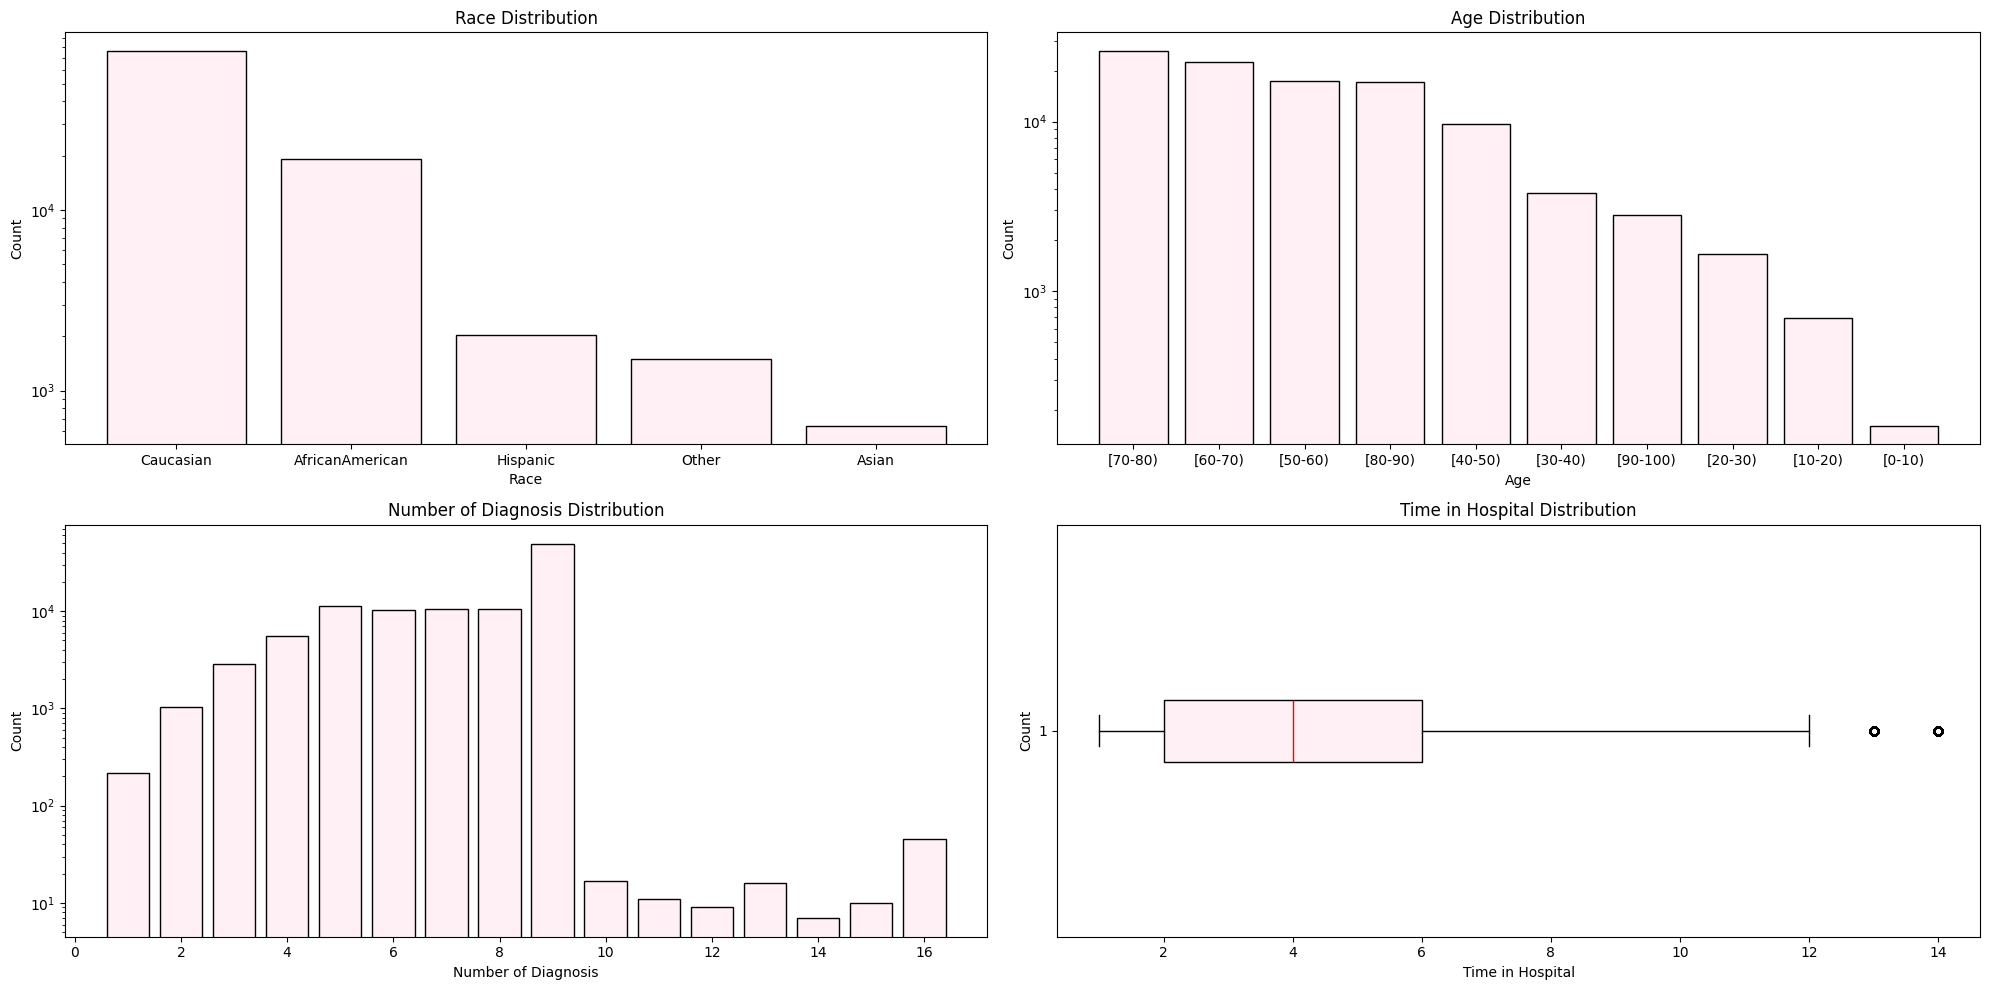

In [ ]:
# Statistics
num_instances = df.shape[0]
num_features = df.shape[1]
print("# of instances and features are: ", num_instances, num_features)
# print(df.describe())

fig, axes = plt.subplots(2,2, figsize=(20, 10))

race = df.iloc[:, 2]
race_count = race.value_counts()
race_index = race_count.index.tolist()
race_value = race_count.values.tolist()
axes[0,0].bar(race_index,race_value, color='lavenderblush', edgecolor='black')
axes[0,0].set_title("Race Distribution")
axes[0,0].set_xlabel("Race")
axes[0,0].set_ylabel("Count")
axes[0,0].set_yscale('log')

age = df.iloc[:, 4]
age_count = age.value_counts()
age_index = age_count.index.tolist()
age_value = age_count.values.tolist()
axes[0,1].bar(age_index, age_value, color='lavenderblush', edgecolor='black')
axes[0,1].set_title("Age Distribution")
axes[0,1].set_xlabel("Age")
axes[0,1].set_ylabel("Count")
axes[0,1].set_yscale('log')

num_dignosis = df.iloc[:, 21]
num_dignosis_count = num_dignosis.value_counts()
num_dignosis_index = num_dignosis_count.index.tolist()
num_dignosis_value = num_dignosis_count.values.tolist()
axes[1,0].bar(num_dignosis_index, num_dignosis_value, color='lavenderblush', edgecolor='black')
axes[1,0].set_title("Number of Diagnosis Distribution")
axes[1,0].set_xlabel("Number of Diagnosis")
axes[1,0].set_ylabel("Count")
axes[1,0].set_yscale('log')

time_in_hospital = df.iloc[:, 9]
time_in_hospital_count = time_in_hospital.value_counts()
time_in_hospital_index = time_in_hospital.index.tolist()
time_in_hospital_value = time_in_hospital.values.tolist()
# axes[1,1].hist(time_in_hospital_index, time_in_hospital_value, color='lavenderblush', edgecolor='black')
axes[1,1].boxplot(time_in_hospital, vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lavenderblush', color='black'),
            whiskerprops=dict(color='black'), medianprops=dict(color='red'))
axes[1,1].set_title("Number of Time in Hospital Distribution")
axes[1,1].set_xlabel("Number of Time in Hospital")
axes[1,1].set_ylabel("Count")



plt.tight_layout()
plt.show()


The dataset we have chosen is __Diabetes 130-US hospitals__, there are 101766 instances and there are 50 features.

Text(0.5, 1.0, 'Age vs Number of Diagnoses Linear Fit')

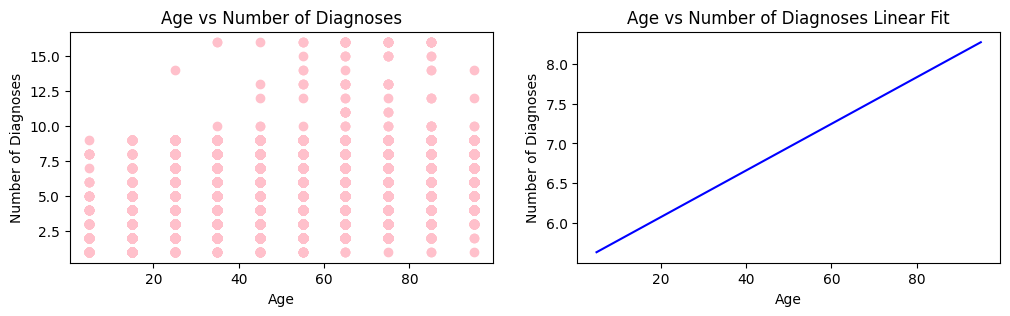

In [ ]:
#LinearReg Age

figure,axes = plt.subplots(1,2,figsize=(12,3))

def convert_age_range(age_range):
    lower_str, upper_str = age_range.split("-")
    lower_bound = int(lower_str[1:])
    upper_bound = int(upper_str[:-1])
    return (lower_bound + upper_bound) / 2
#print(df['age'][0])

transformed_age = df['age'].apply(convert_age_range)

X = transformed_age.values.reshape(-1, 1)
y = df['number_diagnoses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions over a range of x values for visualization
x_spaced = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # 100 points between min and max age
yhat_spaced = lr.predict(x_spaced)

#plt.figure(figsize=(6, 4))
axes[0].scatter(X, y, color='pink')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of Diagnoses')
axes[0].set_title('Age vs Number of Diagnoses')

axes[1].plot(x_spaced, yhat_spaced, color='blue')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Number of Diagnoses')
axes[1].set_title('Age vs Number of Diagnoses Linear Fit')

#print(f"Coefficients: {lr.coef_}")
#print(f"Intercept: {lr.intercept_}")


C:\Users\canid\AppData\Local\Temp\ipykernel_22196\3586329441.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_mapped_cleaned = df_cleaned_race['race'].replace(codes)


[Text(0, 0, 'Caucasian'),
 Text(1, 0, 'African American'),
 Text(2, 0, 'Hispanic'),
 Text(3, 0, 'Asian'),
 Text(4, 0, 'Other')]

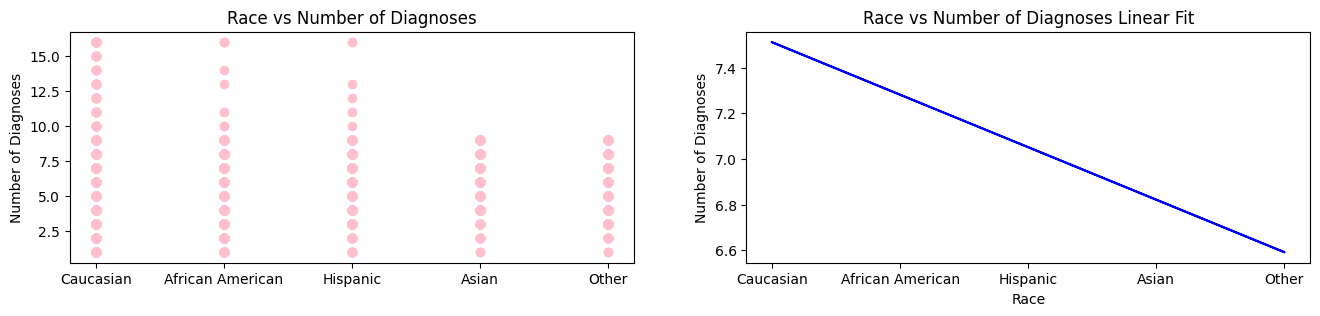

In [ ]:
#LinearReg Race
figure,axes = plt.subplots(1,2,figsize=(16,3))

codes = {"Caucasian" : 0, "AfricanAmerican" : 1, "Hispanic" : 2, "Asian" : 3, "Other" : 4}

# no missing values in 'x_mapped'
df_cleaned_race = df.dropna(subset=['race'])

# Map race to numerical values
x_mapped_cleaned = df_cleaned_race['race'].replace(codes)

X = x_mapped_cleaned.values.reshape(-1, 1)  # Reshaping into (n_samples, n_features)
y = df_cleaned_race['number_diagnoses']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr2 = LinearRegression()
lr2.fit(X_train, y_train)

#print(f"Coefficients: {lr2.coef_}")
#print(f"Intercept: {lr2.intercept_}")

yhat = lr2.predict(X_test)

axes[0].scatter(X, y, color='pink')
axes[1].set_xlabel('Race')
axes[0].set_ylabel('Number of Diagnoses')
axes[0].set_title('Race vs Number of Diagnoses')

axes[1].plot(X_test, yhat, color='blue')
axes[1].set_xlabel('Race')
axes[1].set_ylabel('Number of Diagnoses')
axes[1].set_title('Race vs Number of Diagnoses Linear Fit')

x_ticks_codes = {"Caucasian" : 0, "African American" : 1, "Hispanic" : 2, "Asian" : 3, "Other" : 4}
race_labels = list(x_ticks_codes.keys())  # ['Caucasian', 'AfricanAmerican', 'Hispanic', 'Asian', 'Other']

axes[0].set_xticks(np.arange(len(race_labels)))  # set x-ticks positions to match the number of races
axes[0].set_xticklabels(race_labels)

axes[1].set_xticks(np.arange(len(race_labels)))
axes[1].set_xticklabels(race_labels)

c:\Users\canid\OneDrive\Masaüstü\Python\CS_178\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Times in Hospital vs Number of Diagnoses Linear Fit')

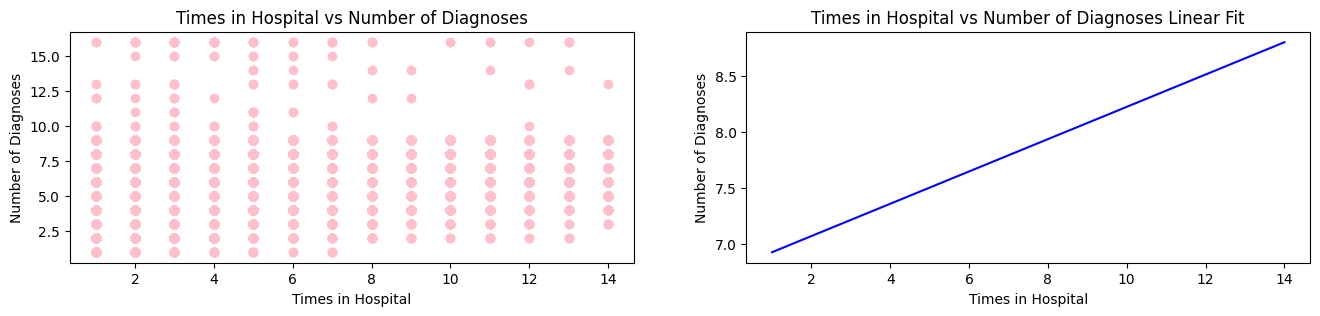

In [ ]:
#LinearReg Times in Hospital
figure,axes = plt.subplots(1,2,figsize=(16,3))

df_cleaned_time = df.dropna(subset=['time_in_hospital'])


X = df_cleaned_time[['time_in_hospital']]
y = df_cleaned_time['number_diagnoses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

# make predictions for line
x_spaced = np.linspace(X['time_in_hospital'].min(), X['time_in_hospital'].max(), 100).reshape(-1, 1)  # 100 points between min and max age
yhat_spaced = lr.predict(x_spaced)


axes[0].scatter(X, y, color='pink')
axes[0].set_xlabel('Times in Hospital')
axes[0].set_ylabel('Number of Diagnoses')
axes[0].set_title('Times in Hospital vs Number of Diagnoses')

axes[1].plot(x_spaced, yhat_spaced, color='blue')
axes[1].set_xlabel('Times in Hospital')
axes[1].set_ylabel('Number of Diagnoses')
axes[1].set_title('Times in Hospital vs Number of Diagnoses Linear Fit')

In [ ]:
#Decision Tree

In [ ]:
#KNN?
